In [1]:
import numpy as np

np.random.seed(42)

T, N = 200, 100
dx, dz, dy, K = 3, 3, 3, 3   # covariates=3, latent=3, response=3, 3 classes

X = np.random.randn(T, N, dx)        # covariates
Z = np.zeros((T, N, dz))             # latent (now per observation)
Y = np.zeros((T, N, dy))             # response
labels = np.zeros((T, N), dtype=int) # class labels

# random weights
u = np.random.randn(K, dx+dz)
v = np.random.randn(K, dx+dz)
w = np.random.randn(K, dx+dz)
d = np.random.randn(K, dx+dz)

# mean function
def mean_func(h, z, k):
    if k == 0:
        return np.array([
            np.tanh(h @ u[0]) + z[0],
            np.sin(h @ v[0]) + z[1],
            0.5*(h @ w[0]) - z[2]
        ])
    elif k == 1:
        return np.array([
            np.tanh(h @ u[1]) - z[0],
            np.sin(h @ v[1]) + z[1],
            0.5*(h @ w[1]) + z[2]
        ])
    else:  # k == 2
        return np.array([
            np.tanh(h @ u[2]) + z[0],
            np.sin(h @ v[2]) - z[1],
            0.5*(h @ w[2]) + z[2]
        ])

# sigma function
def sigma_func(h, z, k):
    if k == 0:
        val = 0.1 * abs(h @ d[0]) + 0.2*abs(z[0])
        return np.clip(val, 0.1, 2.0) * np.ones(dy)
    elif k == 1:
        val = 0.1 * abs(h @ d[1]) + 0.2*abs(z[1])
        return np.clip(val, 0.1, 2.5) * np.ones(dy)
    else:  # k == 2
        val = 0.1 * abs(h @ d[2]) + 0.2*abs(z[2])
        return np.clip(val, 0.1, 3.0) * np.ones(dy)

# ---- data generation ----
for t in range(T):
    for n in range(N):
        if t < 100:
            Z[t,n] = np.random.normal(0, 1, dz)
        else:
            Z[t,n] = np.random.normal(5, 1, dz)

        h = np.concatenate([X[t,n], Z[t,n]])
        k = np.random.choice(K)
        labels[t,n] = k

        mu = mean_func(h, Z[t,n], k)
        sigma = sigma_func(h, Z[t,n], k)
        Y[t,n] = np.random.normal(mu, sigma)


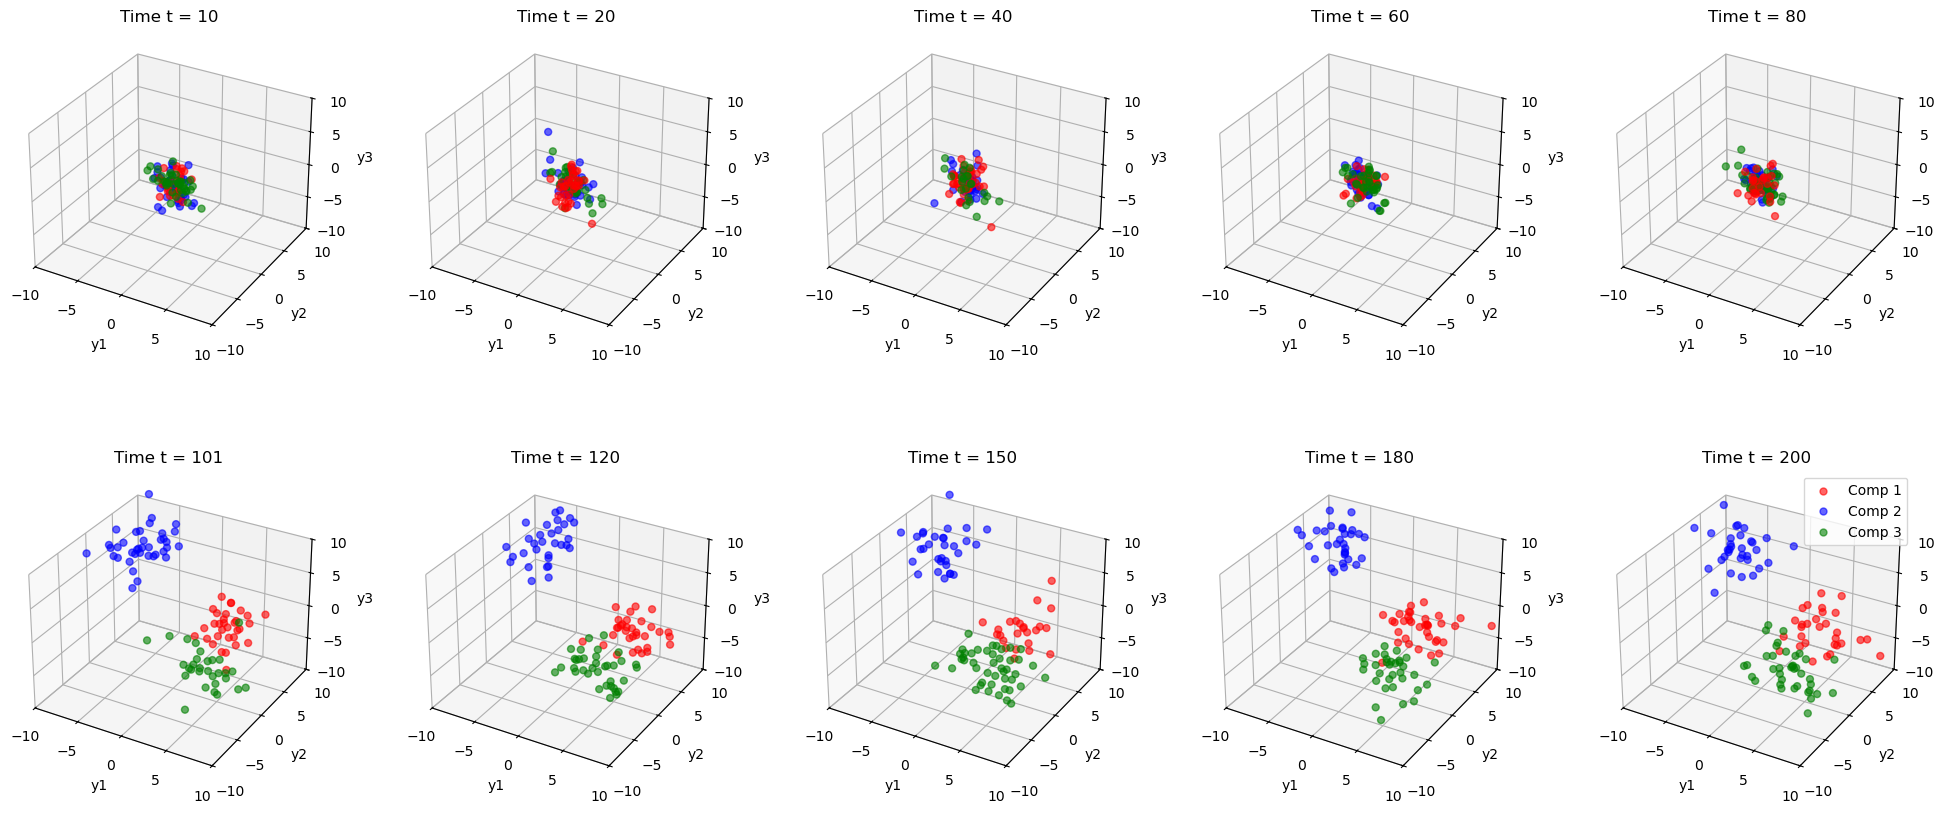

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

time_points = [10, 20, 40, 60, 80, 101, 120, 150, 180, 200]
colors = ["red", "blue", "green"]

fig = plt.figure(figsize=(20, 8))

for i, t in enumerate(time_points, 1):
    ax = fig.add_subplot(2, 5, i, projection="3d")
    yvals = Y[t-1]
    lbls = labels[t-1]

    for k in range(K):
        idx = (lbls == k)
        ax.scatter(yvals[idx, 0], yvals[idx, 1], yvals[idx, 2],
                   c=colors[k], alpha=0.6, s=25, label=f"Comp {k+1}")

    ax.set_title(f"Time t = {t}")
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")
    ax.set_zlabel("y3")
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])
    ax.grid(True)

ax.legend(loc="upper right")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()


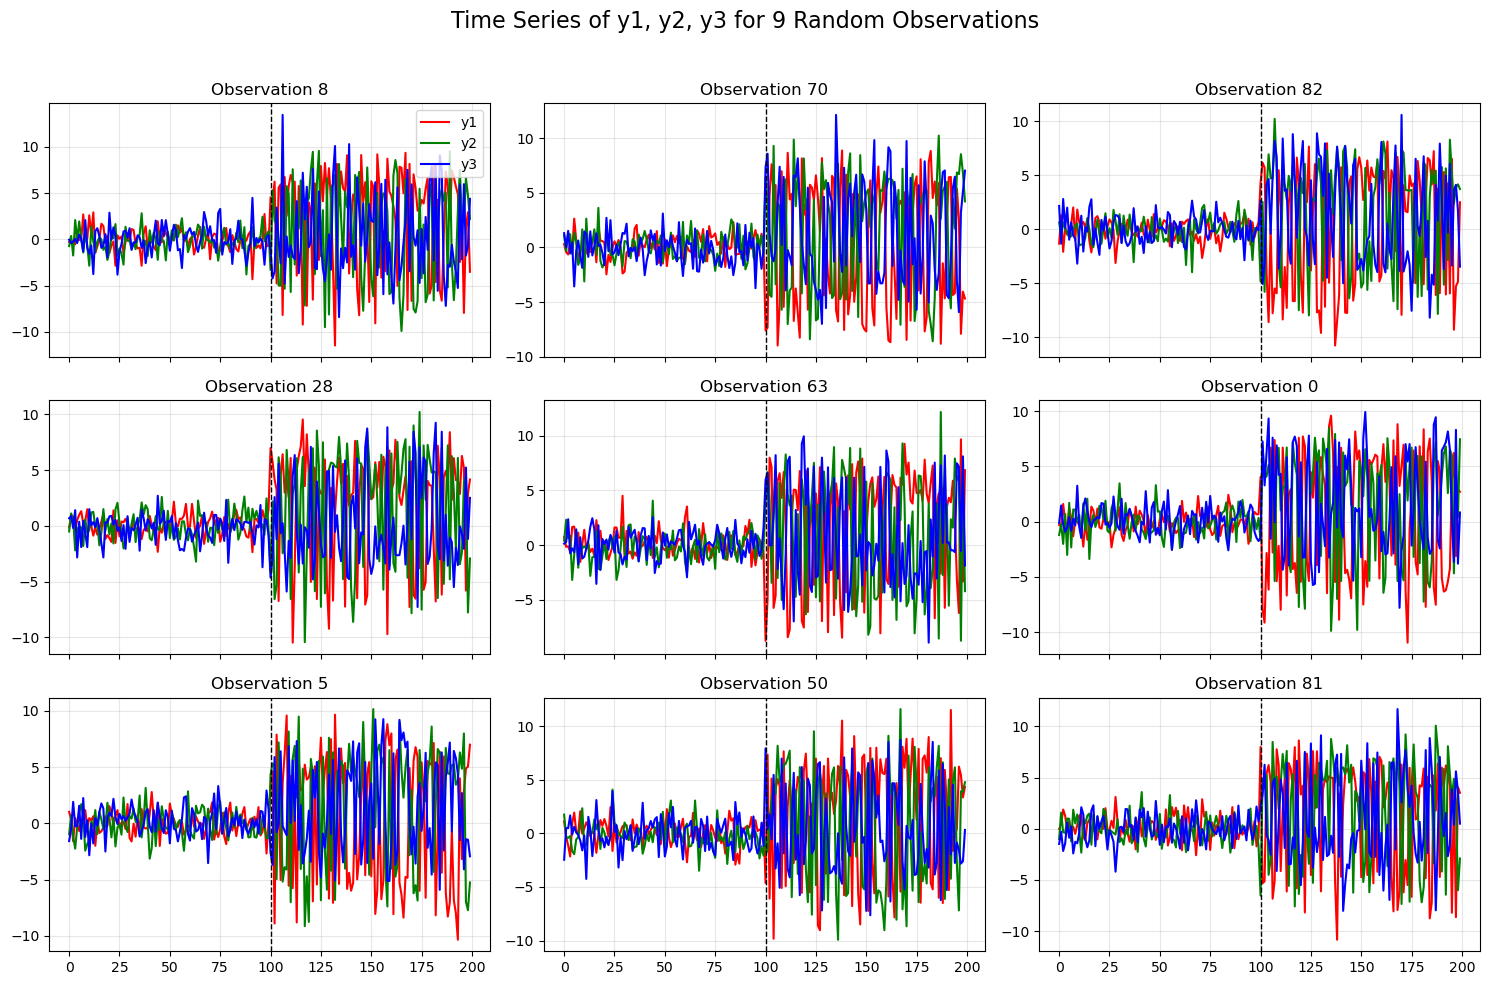

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)
obs_idx = np.random.choice(N, size=9, replace=False)

time = np.arange(T)

fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=False)
axes = axes.flatten()

colors = ['r', 'g', 'b']

for i, idx in enumerate(obs_idx):
    ax = axes[i]
    for d in range(dy):
        ax.plot(time, Y[:, idx, d], color=colors[d], label=f"y{d+1}" if i == 0 else "")
    

    ax.axvline(100, color="black", linestyle="--", linewidth=1)
    ax.set_title(f"Observation {idx}")
    ax.grid(True, alpha=0.3)


axes[0].legend(loc="upper right")

fig.suptitle("Time Series of y1, y2, y3 for 9 Random Observations", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
import pandas as pd

x_all = X.reshape(T*N, dx)       # covariates
z_all = Z.reshape(T*N, dz)       # latent (直接 reshape，不用 repeat)
y_all = Y.reshape(T*N, dy)       # response
lbl_all = labels.reshape(T*N,)   # class labels


time_id = np.repeat(np.arange(1, T+1), N)
obs_id  = np.tile(np.arange(1, N+1), T)


x_df = pd.DataFrame(x_all, columns=[f"x{i+1}" for i in range(dx)])
z_df = pd.DataFrame(z_all, columns=[f"z{i+1}" for i in range(dz)])
y_df = pd.DataFrame(y_all, columns=[f"y{i+1}" for i in range(dy)])
meta_df = pd.DataFrame({"time_id": time_id, "obs_id": obs_id, "label": lbl_all})


x_df.to_csv("x_all.csv", index=False)
z_df.to_csv("z_all.csv", index=False)
y_df.to_csv("y_all.csv", index=False)

all_df = pd.concat([meta_df, x_df, z_df, y_df], axis=1)
all_df.to_csv("data_all.csv", index=False)

print("Saved: x_all.csv, z_all.csv, y_all.csv, data_all.csv")



Saved: x_all.csv, z_all.csv, y_all.csv, data_all.csv
